In [5]:
# Imports
import glob
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Global Variables
data_path = '../data/raw/'
substrings_to_remove = [data_path.replace('raw/', 'raw'), '\\', 'RefBldg', '.csv']

# Functions
def get_building_type(filename):
    return re.sub(r'New2004.+', '', filename)

def get_location(filename):
    return re.sub(r'^.*USA_', '', filename)

def get_all_csv_filenames(path):
    return glob.glob(path + "*.csv")

def build_dataframe(filenames):
    building_energy_profiles_list = []
    for filepath in filenames:
        df = pd.read_csv(filepath)
        df['building_type'] = get_building_type(clean_filename(filepath))
        df['location'] = get_location(clean_filename(filepath))
        building_energy_profiles_list.append(df)
    df = pd.DataFrame()
    df = pd.concat(building_energy_profiles_list)
    return df

def clean_filename(filename):
    for substring_to_remove in substrings_to_remove:
        filename = filename.replace(substring_to_remove, '')
    return filename

In [7]:
df = build_dataframe(get_all_csv_filenames(data_path))
df.info() # Shows the rows count and the types
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280320 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Date/Time                                   280320 non-null  object 
 1   Electricity:Facility [kW](Hourly)           280320 non-null  float64
 2   Fans:Electricity [kW](Hourly)               280320 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            280320 non-null  float64
 4   Heating:Electricity [kW](Hourly)            280320 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     280320 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  280320 non-null  float64
 7   Gas:Facility [kW](Hourly)                   280320 non-null  float64
 8   Heating:Gas [kW](Hourly)                    280320 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          157680 non-null  float64
 10

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.84623,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.00000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.00000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.00000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN


In [8]:
for building_type in df.building_type.unique():
    print(building_type)

FullServiceRestaurant
Hospital
LargeHotel
LargeOffice
MediumOffice
MidriseApartment
OutPatient
PrimarySchool
QuickServiceRestaurant
SecondarySchool
SmallHotel
SmallOffice
Stand-aloneRetail
StripMall
SuperMarket
Warehouse


## EDA

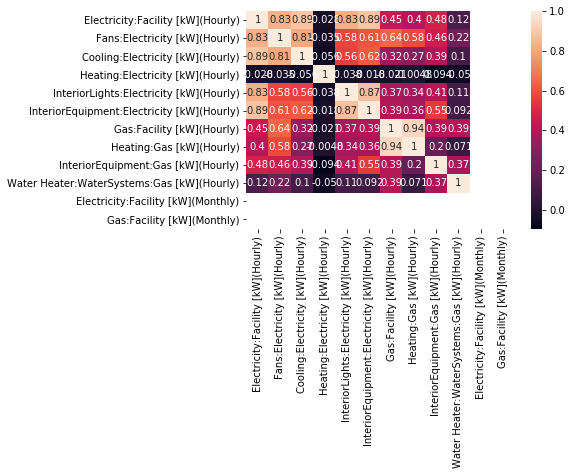

In [9]:
# Correlation Matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

The correlation matrix shows a very weak correlation between Heating_Electricity_kW_Hourly and all other columns. This could mean that most of these buildings are using gas for heating.

In [ ]:
# Pairs Plot
sns.pairplot(df.drop(["Electricity:Facility [kW](Monthly)", "Gas:Facility [kW](Monthly)"], axis=1))
plt.show()

In [ ]:
# distribution chart for energy usage per building type
# avg load per hour per building type

